In [1]:
"""
Created on Fri Mar 11 10:45:01 2022

@author: leotc
"""

from numpy import *
from math import isclose
import os 
import statistics
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import emcee

In [2]:
# sorry, was lazy with directory
totalpoints = open("C:/Users/leotc/Documents/Uni/PHYS3080/Distance_Ladder/Data/Camera Images/calibrated star data.txt", "r")      
pointdata = totalpoints.readlines()[1:]

## Note: Assumed 0.1% uncertainty in periods; not calcualted

In [3]:
distance = []
periods = []
luminosity = []

for i in pointdata:
    
    i = i.split()
    period = i[-2]
    green_flux = i[4]
    dist = i[-3]
    
    if float(period) != 0: 
        periods.append(float(period))
        abs_mag = np.log10(float(green_flux)) + 2*np.log10(float(dist))
        luminosity.append(abs_mag)

Text(0.5, 1.0, 'all period lum relations')

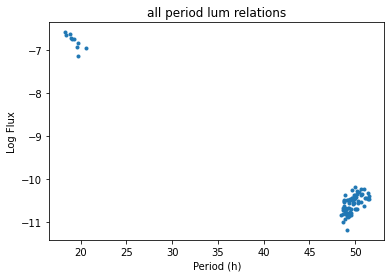

In [4]:
plt.scatter(periods, luminosity, marker='.')
plt.xlabel('Period (h)')
plt.ylabel('Log Flux')
plt.title('all period lum relations')

In [5]:
distance = []
long_periods = []
long_luminosity = []
yerr = []
xerr = []

for i in pointdata:
    
    i = i.split()
    period = float(i[-2])
    green_flux = float(i[4])
    dist = float(i[-3])
    
    if float(period) > 35:
        xerr.append(0.001*period) # assume 0.1% uncertainty in periods, TO BE REVIEWED
        long_periods.append(period)
        abs_mag = np.log10(green_flux) + 2*np.log10(dist)
        yerr.append((1/2.3)*((0.015)**2+(0.01)**2)**(1/2)) # 1.5% uncertianty in flux
        long_luminosity.append(abs_mag)

Text(0.5, 1.0, 'long period lum relations')

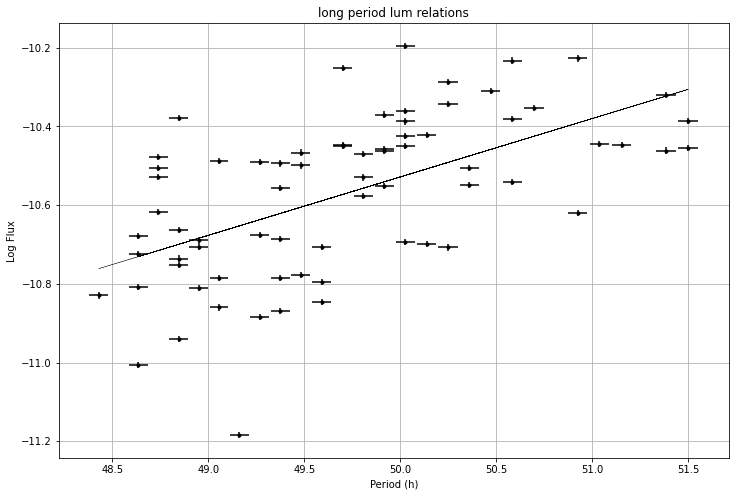

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.errorbar(long_periods, long_luminosity, yerr=yerr, xerr=xerr, fmt='.k')
ax1.plot(long_periods,long_poly(long_periods),"k",  linewidth=0.3)
ax1.grid()
plt.rcParams["figure.figsize"] = (12, 8)
plt.xlabel('Period (h)')
plt.ylabel('Log Flux')
plt.title('long period lum relations')

In [7]:
long_fit = np.polyfit(long_periods, long_luminosity, 1)
long_poly = np.poly1d(long_fit)

In [15]:
long_fit

array([  0.14836345, -17.94644976])

- For stars with long periods (~50hrs), the relation is given as: <br />
## $ Log (Flux) = 0.14836345*P - 17.94644976 $ <br />
- explicitly:
## $ distance_{long}(pc) = \sqrt{\frac{10^{0.14836345*P (hours) - 17.94644976}}{green flux (W)}} $

In [82]:
yerr1 = np.array(yerr)
xerr1 = np.array(xerr)

A = np.vander(long_periods, 2)
ATA = np.dot(A.T/((xerr1 ** 2)[None,:]), A / ((yerr1 ** 2)[:, None]))
cov = np.linalg.inv(ATA)
w = np.linalg.solve(ATA, np.dot(A.T / ((xerr1 ** 2)[:, None], long_luminosity / yerr1 ** 2)))
print("Least-squares estimates:")
print("m = {0:.3f} ± {1:.3f}".format(w[0], np.sqrt(cov[0, 0])))
print("b = {0:.3f} ± {1:.3f}".format(w[1], np.sqrt(cov[1, 1])))

C:\Users\leotc\AppData\Local\Temp\ipykernel_3352\4274280305.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w = np.linalg.solve(ATA, np.dot(A.T / ((xerr1 ** 2)[:, None], long_luminosity / yerr1 ** 2)))


ValueError: could not broadcast input array from shape (71,1) into shape (71,)

In [32]:
distance = []
short_periods = []
short_luminosity = []

for i in pointdata:
    
    i = i.split()
    period = i[-2]
    green_flux = i[4]
    dist = i[-3]
    
    if float(period) < 35 and float(period) != 0: 
        short_periods.append(float(period))
        abs_mag = np.log10(float(green_flux)) + 2*np.log10(float(dist))
        short_luminosity.append(abs_mag)

In [9]:
short_fit = np.polyfit(short_periods, short_luminosity, 1)
short_poly = np.poly1d(short_fit)

- For stars with short periods (~50hrs), the relation is given as: <br />
## $ Log(Flux) = -0.20472512*P - 2.856877 $ <br />
- explicitly:
## $ distance_{short}(pc) = \sqrt{\frac{10^{-0.20472512*P (hours) - 2.856877}}{green flux (W)}} $

Text(0.5, 1.0, 'short period lum relations')

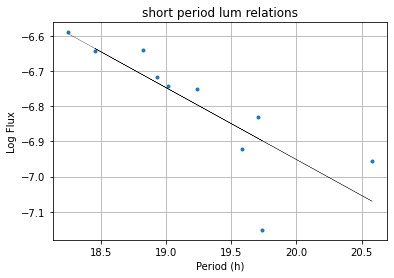

In [10]:
fig = plt.figure()
ax2 = fig.add_subplot(111)

ax2.scatter(short_periods, short_luminosity, marker='.')
ax2.plot(short_periods,short_poly(short_periods),"k", linewidth=0.3)
ax2.grid()
plt.xlabel('Period (h)')
plt.ylabel('Log Flux')
plt.title('short period lum relations')